In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trends_df = pd.read_csv('trends1.csv')
trends_df = trends_df.loc[:, ~trends_df.columns.str.contains('^Unnamed')] #dropping innamed columns 

In [3]:

trends_df["date"] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values(by='date',ascending=True)

In [4]:
trends_df['month_year'] = trends_df['date'].apply(lambda x:x.strftime('%Y-%m')) 

<h4> Grouped by Month as we can see this are the weekly sales<br>and we can use monthly data for clear understanding of the sales trend

In [7]:
df_monthly_sales=trends_df.groupby('month_year').sum().reset_index()

In [8]:
df_monthly_sales.set_index('month_year',inplace=True)

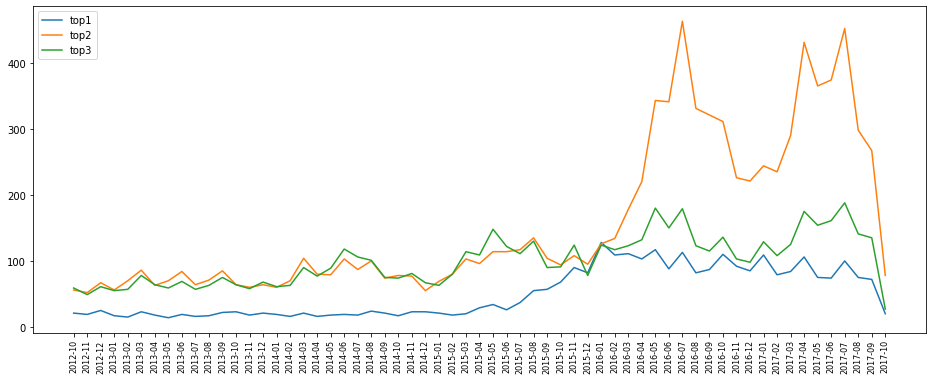

In [17]:
plt.figure(figsize=(16,6))
plt.xticks(rotation='vertical',size = 8)
top1, = plt.plot(df_monthly_sales['top 1'],label="top1")
top2, = plt.plot(df_monthly_sales['top 2'],label="top2")
top3, = plt.plot(df_monthly_sales['top 3'],label="top3")
leg = plt.legend(loc='upper left')
plt.show()

<h4> from this monthly data plot we can see top 2 is the best performing .<br>
    because we can observe an uptrend that is clearly significatly higher than top 3 and top 1<br>
    so the bet performing serial is<br>
    - top2<br>
    - top3<br>
    - top1<br>
    

In [16]:
# def plot_df(df, x, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=100)
#     plt.plot(x, y1, color='tab:red')
#     plt.plot(x, y2, color='tab:blue')
#     plt.plot(x, y3, color='tab:green')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [18]:
def plot_df(df, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot( y1, color='tab:red')
    plt.plot( y2, color='tab:blue')
    plt.plot( y3, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

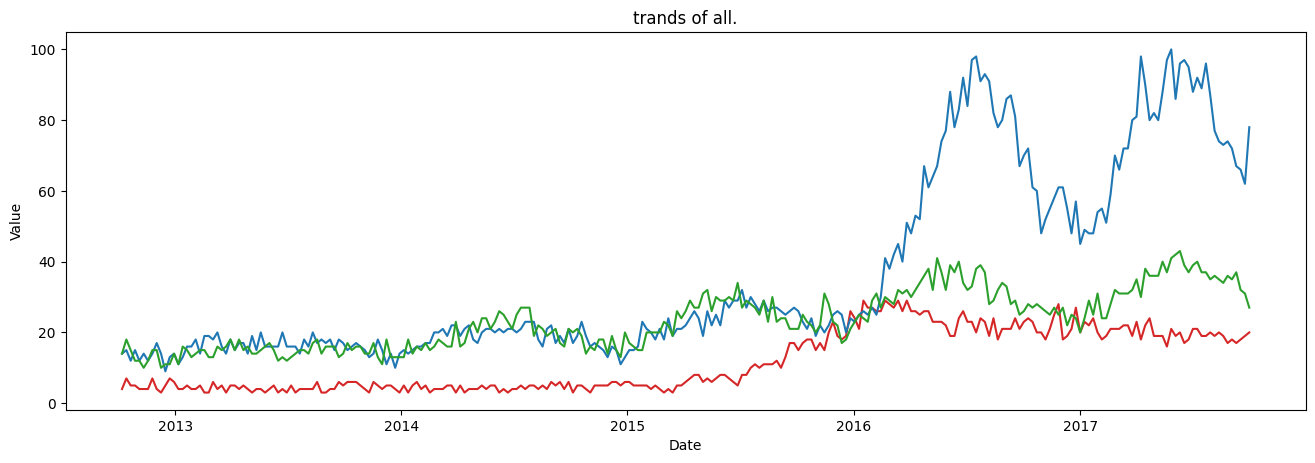

In [19]:
plot_df(trends_df, y1=trends_df['top 1'],y2=trends_df['top 2'],y3=trends_df['top 3'], title='trands of all.')

In [40]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window,center=True).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [41]:
test_ts1 = trends_df['top 1']
test_ts1.head()

date
2012-10-07    4
2012-10-14    7
2012-10-21    5
2012-10-28    5
2012-11-04    4
Name: top 1, dtype: int64

In [30]:
test_ts2 = trends_df['top 2']
test_ts2.head()

date
2012-10-07    14
2012-10-14    15
2012-10-21    12
2012-10-28    15
2012-11-04    12
Name: top 2, dtype: int64

In [6]:
test_ts3 = trends_df['top 3']
test_ts3.head()

date
2012-10-07    14
2012-10-14    18
2012-10-21    15
2012-10-28    12
2012-11-04    12
Name: top 3, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\335832906.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


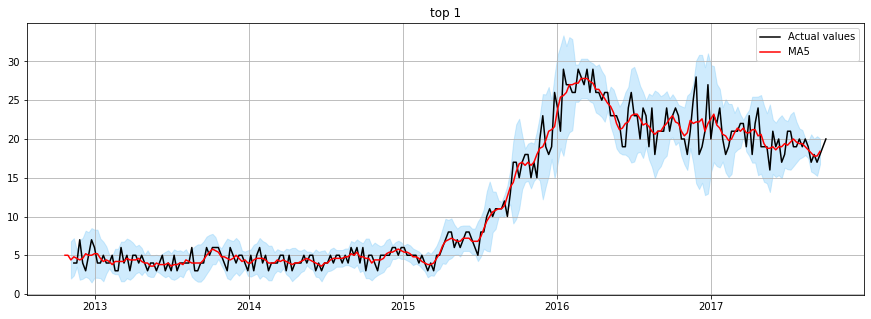

In [48]:
plot_ts(test_ts1, window=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\3209949617.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


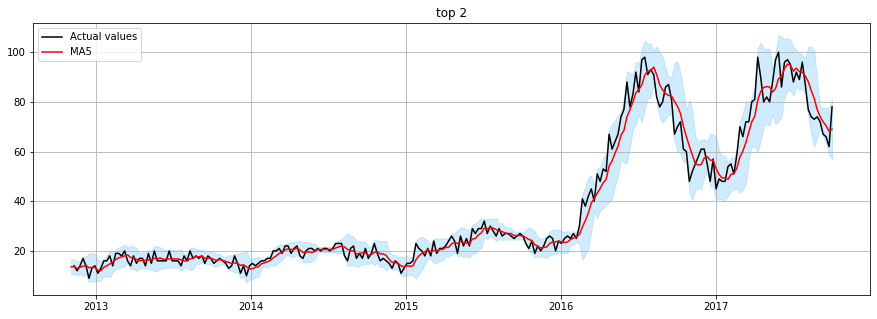

In [33]:
plot_ts(test_ts2, window=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\3209949617.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


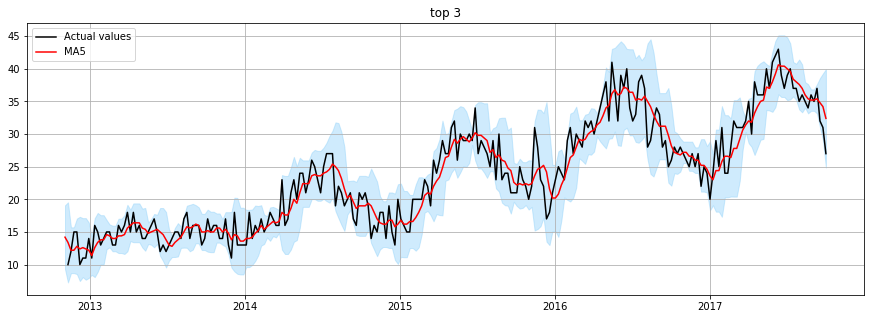

In [34]:
plot_ts(test_ts3, window=5)

In [14]:
# analysis=trends_df['top 3']
analysis = trends_df[['top 1']].copy()
# test_ts3.head()
analysis.head()

,top 1
date,
2012-10-07,4
2012-10-14,7
2012-10-21,5
2012-10-28,5
2012-11-04,4


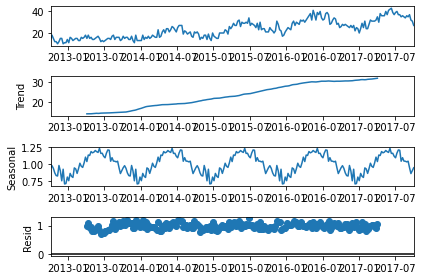

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis = trends_df[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

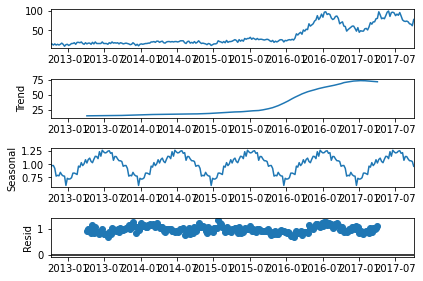

In [16]:
analysis = trends_df[['top 2']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

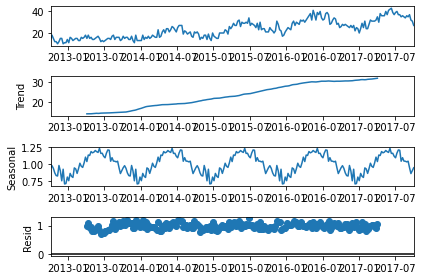

In [17]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

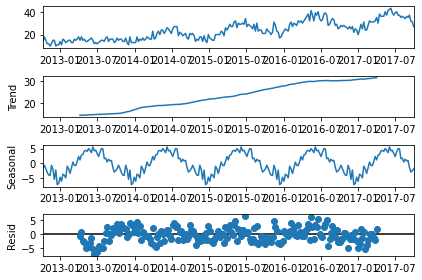

In [22]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();